## 데이콘 Basic 풍속 예측 AI 경진대회


-월: 데이터가 기록된 달을 나타냅니다.  
일: 데이터가 기록된 날짜를 나타냅니다.  
측정 시간대: 데이터가 측정된 시간대를 나타냅니다. (  오전, 오후, 저녁, 새벽 )   
섭씨 온도 (° ⁣C)  
절대 온도 (K)  
이슬점 온도 (° ⁣C)  
상대 습도 (%)  
대기압 (mbar)  
포화 증기압 (mbar)  
실제 증기압 (mbar)  
증기압 부족량 (mbar)  
수증기 함량 (g/kg): 공기 1 kg당 수증기의 질량을 그램(g) 단위로 나타냅니다.  
공기 밀도 (g/m**3): 1 m³의 부피에 들어있는 공기의 질량을 그램(g) 단위로   나타냅니다.  
풍향 (deg): 바람의 향하는 방향을 각도(degree)로 나타냅니다.  


다음과 같은 feature 을 가지고 있다.


- 실제로 풍속을 예측하는 과정에서 살피는 feature 들을 확인하자.

1 . 기후조건, 지형 등의 변수를 고려해야 한다.   
1-2 . 특히 기후변수는 대기 온도, 압력, 풍속 및 태양복사열 등으로 복잡
하게 구성되어 있다.


In [ ]:
from google.colab import drive

drive.mount('/drive')

Mounted at /drive


In [ ]:
%cd /content/drive/MyDrive/dacon

/content/drive/MyDrive/dacon


In [ ]:
# !unzip weather.zip

Archive:  weather.zip
replace open/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: open/sample_submission.csv  
replace open/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: open/test.csv           
replace open/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: open/train.csv          


In [ ]:
%cd open

/content/drive/MyDrive/dacon/open


In [ ]:
# !ls -al

total 239201
-rw------- 1 root root  16000023 Apr  5 14:43 sample_submission.csv
-rw------- 1 root root 112233432 Apr  5 14:43 test.csv
-rw------- 1 root root 116707688 Apr  5 14:43 train.csv


In [ ]:
import pandas as pd


train = pd.read_csv('train.csv')
train

,ID,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s)
0,TRAIN_00000,7,2,저녁,13.97,287.78,9.84,76.10,992.08,15.98,12.16,3.82,7.66,1198.06,155.60,1.61
1,TRAIN_00001,8,21,오전,16.94,290.85,12.14,73.30,991.07,19.33,14.17,5.16,8.94,1183.67,177.00,1.68
2,TRAIN_00002,11,1,저녁,9.76,283.84,5.40,74.20,988.71,12.10,8.98,3.12,5.67,1213.22,146.20,0.73
3,TRAIN_00003,12,28,오전,5.27,277.30,2.71,83.50,1014.25,8.89,7.43,1.47,4.57,1265.48,264.50,2.71
4,TRAIN_00004,9,26,오후,17.35,290.86,12.68,74.00,995.77,19.84,14.68,5.16,9.22,1187.40,19.34,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36576,TRAIN_36576,8,10,저녁,14.10,287.79,4.99,54.15,993.53,16.11,8.73,7.39,5.48,1200.85,292.90,0.77
36577,TRAIN_36577,2,20,오전,3.80,277.91,-1.01,70.70,988.03,8.02,5.67,2.35,3.58,1240.06,210.50,8.97
36578,TRAIN_36578,5,29,저녁,20.06,295.10,16.70,81.00,977.90,23.51,19.04,4.47,12.20,1153.24,19.22,2.58
36579,TRAIN_36579,9,10,저녁,25.65,299.81,15.30,52.81,988.39,32.98,17.41,15.56,11.03,1144.61,225.40,0.36


In [ ]:
test = pd.read_csv('test.csv')
test

,ID,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg)
0,TEST_00000,3,24,새벽,4.28,278.68,-0.21,72.5,984.48,8.30,6.02,2.28,3.81,1233.29,251.80
1,TEST_00001,9,24,저녁,13.40,286.81,10.36,81.8,996.98,15.40,12.59,2.80,7.89,1206.20,225.60
2,TEST_00002,5,28,저녁,19.89,294.33,14.95,73.2,984.83,23.26,17.03,6.23,10.82,1163.06,10.39
3,TEST_00003,1,17,저녁,-2.88,270.44,-4.47,88.7,998.02,4.94,4.38,0.56,2.73,1284.19,260.20
4,TEST_00004,10,22,오후,6.97,281.18,4.36,83.4,987.00,10.01,8.35,1.66,5.28,1223.47,262.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15673,TEST_15673,3,16,새벽,1.61,274.67,-0.49,85.9,1001.26,6.86,5.89,0.97,3.67,1266.62,56.18
15674,TEST_15674,9,5,오후,18.27,292.19,13.35,73.0,990.98,21.03,15.35,5.68,9.69,1177.63,265.30
15675,TEST_15675,8,8,새벽,16.08,289.66,12.25,78.0,994.97,18.30,14.28,4.03,8.97,1191.84,189.80
15676,TEST_15676,2,4,새벽,3.07,276.68,-0.95,74.8,994.31,7.62,5.70,1.92,3.57,1251.24,269.70


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36581 entries, 0 to 36580
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36581 non-null  object 
 1   월               36581 non-null  int64  
 2   일               36581 non-null  int64  
 3   측정 시간대          36581 non-null  object 
 4   섭씨 온도(°⁣C)      36581 non-null  float64
 5   절대 온도(K)        36581 non-null  float64
 6   이슬점 온도(°C)      36581 non-null  float64
 7   상대 습도 (%)       36581 non-null  float64
 8   대기압(mbar)       36581 non-null  float64
 9   포화 증기압(mbar)    36581 non-null  float64
 10  실제 증기압(mbar)    36581 non-null  float64
 11  증기압 부족량(mbar)   36581 non-null  float64
 12  수증기 함량 (g/kg)   36581 non-null  float64
 13  공기 밀도 (g/m**3)  36581 non-null  float64
 14  풍향 (deg)        36581 non-null  float64
 15  풍속 (m/s)        36581 non-null  float64
dtypes: float64(12), int64(2), object(2)
memory usage: 4.5+ MB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train.corr()

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,809 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120509 files and direc

In [ ]:
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')

<ipython-input-10-3432676faaf2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(train.corr(),
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8291 (\N{INVISIBLE SEPARATOR}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8291 (\N{INVISIBLE SEPARATOR}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8291 (\N{INVISIBLE SEPARATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


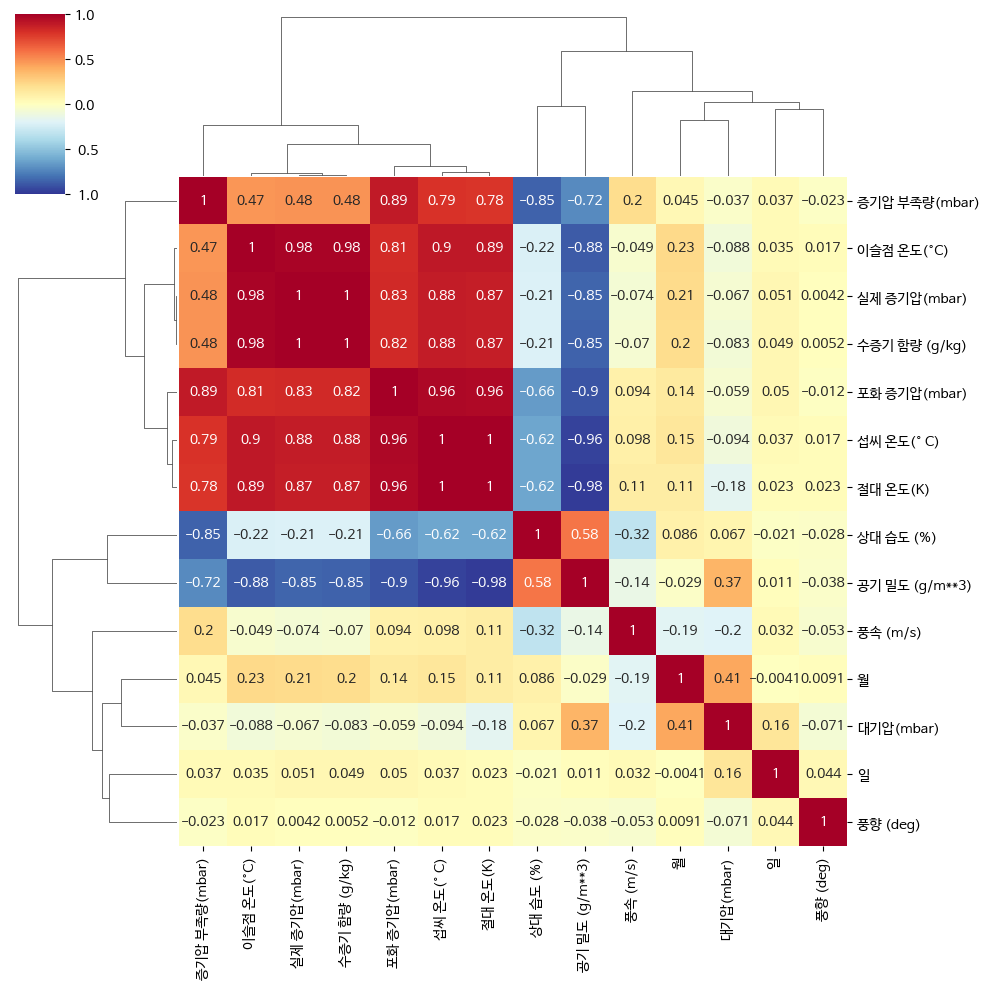

In [ ]:
sns.clustermap(train.corr(),
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )


# 한국어 폰트 깔아줘야함
#  월  / 일 / 섭씨  온도 /	절대  온도 /	이슬점 온도 /상대 습도/	대기압/	포화 증기압/	실제 증기압 /	증기압 부족량 /	수증기 함량 /	공기 밀도 /	풍향 /	풍속 /

In [ ]:
# 증기압 - 포화 증기압
# 이슬점 - 섭씨 - 절대
# 실제 증기압 - 섭씨 - 절대
# 수증기 포화
# Correlation 이 높은 수치들 .

<Axes: xlabel='월', ylabel='풍속 (m/s)'>

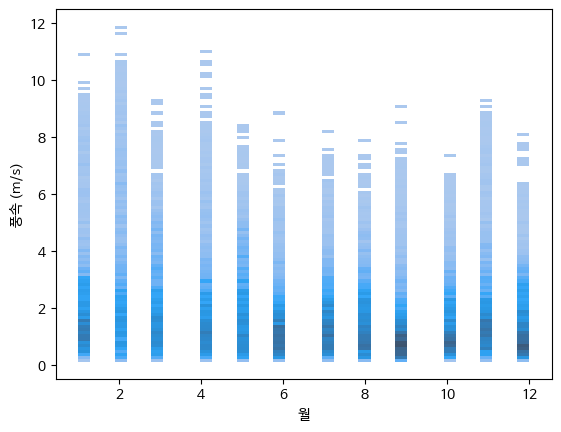

In [ ]:
sns.histplot(train, x = '월', y ='풍속 (m/s)' )

<Axes: xlabel='측정 시간대', ylabel='풍속 (m/s)'>

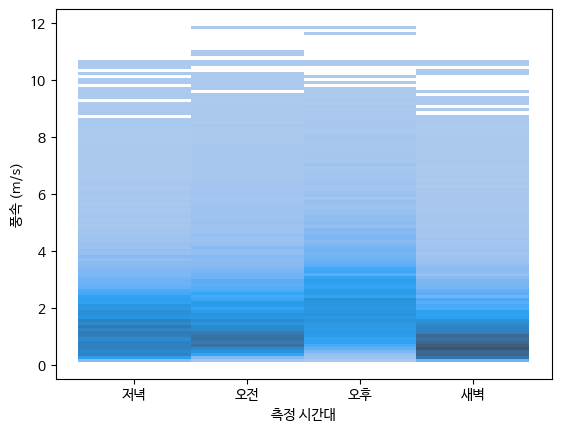

In [ ]:
sns.histplot(train, x = '측정 시간대', y ='풍속 (m/s)' )

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le = le.fit(train['측정 시간대'])
train['측정 시간대'] = le.transform(train['측정 시간대'])
test['측정 시간대'] = le.transform(test['측정 시간대'])

In [ ]:
train

,ID,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s)
0,TRAIN_00000,7,2,3,13.97,287.78,9.84,76.10,992.08,15.98,12.16,3.82,7.66,1198.06,155.60,1.61
1,TRAIN_00001,8,21,1,16.94,290.85,12.14,73.30,991.07,19.33,14.17,5.16,8.94,1183.67,177.00,1.68
2,TRAIN_00002,11,1,3,9.76,283.84,5.40,74.20,988.71,12.10,8.98,3.12,5.67,1213.22,146.20,0.73
3,TRAIN_00003,12,28,1,5.27,277.30,2.71,83.50,1014.25,8.89,7.43,1.47,4.57,1265.48,264.50,2.71
4,TRAIN_00004,9,26,2,17.35,290.86,12.68,74.00,995.77,19.84,14.68,5.16,9.22,1187.40,19.34,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36576,TRAIN_36576,8,10,3,14.10,287.79,4.99,54.15,993.53,16.11,8.73,7.39,5.48,1200.85,292.90,0.77
36577,TRAIN_36577,2,20,1,3.80,277.91,-1.01,70.70,988.03,8.02,5.67,2.35,3.58,1240.06,210.50,8.97
36578,TRAIN_36578,5,29,3,20.06,295.10,16.70,81.00,977.90,23.51,19.04,4.47,12.20,1153.24,19.22,2.58
36579,TRAIN_36579,9,10,3,25.65,299.81,15.30,52.81,988.39,32.98,17.41,15.56,11.03,1144.61,225.40,0.36


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()


In [ ]:
sc_list = ['섭씨 온도(°⁣C)', '절대 온도(K)', '이슬점 온도(°C)', '상대 습도 (%)', '대기압(mbar)', '포화 증기압(mbar)' ,'실제 증기압(mbar)', '증기압 부족량(mbar)', '수증기 함량 (g/kg)', '공기 밀도 (g/m**3)' , '풍향 (deg)']

In [ ]:
import numpy as np
for i in sc_list:
    print()
    break

[[13.97]
 [16.94]
 [ 9.76]
 ...
 [20.06]
 [25.65]
 [ 3.14]]


In [ ]:
temp = np.array(train[i]).reshape(-1,1)
temp

array([[13.97],
       [16.94],
       [ 9.76],
       ...,
       [20.06],
       [25.65],
       [ 3.14]])

In [ ]:
# scaler 필요한 data들

scaler = MinMaxScaler()

for i in sc_list:
    temp = np.array(train[i]).reshape(-1,1)
    temp2 = np.array(test[i]).reshape(-1,1)
    scaler.fit(temp)
    train[i] = scaler.transform(temp)
    test[i] = scaler.transform(temp2)


In [ ]:
train

In [ ]:
test

In [ ]:
# 11-12-1 / 2-3-4 / 5-6-7 / 8-9-10 4개로 묶어준다.
for i in range(len(train)):
    if train['월'][i] in [11,12,1]:
        train['월'][i] = 0
    elif train['월'][i] in [2,3,4]:
        train['월'][i] = 1
    elif train['월'][i] in [5,6,7]:
        train['월'][i] = 2
    elif train['월'][i] in [8,9,100]:
        train['월'][i] = 3

In [ ]:
for i in range(len(test)):
    if test['월'][i] in [11,12,1]:
        test['월'][i] = 0
    elif test['월'][i] in [2,3,4]:
        test['월'][i] = 1
    elif test['월'][i] in [5,6,7]:
        test['월'][i] = 2
    elif test['월'][i] in [8,9,100]:
        test['월'][i] = 3

In [ ]:
train

,ID,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s)
0,TRAIN_00000,2,2,3,0.577999,0.581106,0.711285,0.687009,0.602465,0.266475,0.474118,0.092651,0.471861,0.366023,0.432206,1.61
1,TRAIN_00001,3,21,1,0.639528,0.642814,0.775693,0.650340,0.585174,0.330651,0.566193,0.125152,0.564214,0.305766,0.491653,1.68
2,TRAIN_00002,0,1,3,0.490781,0.501910,0.586950,0.662127,0.544770,0.192146,0.328447,0.075673,0.328283,0.429505,0.406095,0.73
3,TRAIN_00003,0,28,1,0.397763,0.370452,0.511621,0.783918,0.982024,0.130651,0.257444,0.035654,0.248918,0.648340,0.734715,2.71
4,TRAIN_00004,3,26,2,0.648022,0.643015,0.790815,0.659508,0.665639,0.340421,0.589556,0.125152,0.584416,0.321385,0.053696,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36576,TRAIN_36576,3,10,3,0.580692,0.581307,0.575469,0.399555,0.627290,0.268966,0.316995,0.179238,0.314574,0.377706,0.813606,0.77
36577,TRAIN_36577,1,20,1,0.367309,0.382714,0.407449,0.616291,0.533128,0.113985,0.176821,0.056997,0.177489,0.541895,0.584711,8.97
36578,TRAIN_36578,2,29,3,0.704164,0.728241,0.903388,0.751179,0.359699,0.410728,0.789281,0.108416,0.799423,0.178343,0.053363,2.58
36579,TRAIN_36579,3,10,3,0.819971,0.822915,0.864184,0.382006,0.539291,0.592146,0.714613,0.377395,0.715007,0.142205,0.626101,0.36


In [ ]:
train_x = train.drop(columns=['ID', '일', '섭씨 온도(°⁣C)', '포화 증기압(mbar)'], axis = 1)

# train_y는 종속변수로 값을 설정합니다.
train_y = train['풍속 (m/s)']

# train에서와 마찬가지로 분석에 활용하지 않는 데이터(id)를 제거합니다.
test_x = test.drop(columns=['ID'])

In [ ]:
train_x = train_x.drop(columns=['풍속 (m/s)'], axis = 1)

In [ ]:
test_x = test_x.drop(columns=['일', '섭씨 온도(°⁣C)', '포화 증기압(mbar)'], axis = 1)

In [ ]:
train_x

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor(random_state=11)

In [ ]:
dt_clf.fit(train_x , train_y)

dt_pred = dt_clf.predict(test_x)


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xg_clf = XGBRegressor(random_state=11)

xg_clf.fit(train_x, train_y)

xg_pred = xg_clf.predict(test_x)

In [ ]:
# !pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.4 MB/s eta 0:00:00


In [ ]:
import catboost as cb
from catboost import CatBoostRegressor

In [ ]:
cb_clf = CatBoostRegressor(random_state=11)

cb_clf.fit(train_x, train_y)

cb_pred = cb_clf.predict(test_x)

Learning rate set to 0.072306
0:	learn: 1.5099295	total: 56.9ms	remaining: 56.8s
1:	learn: 1.4815301	total: 64.5ms	remaining: 32.2s
2:	learn: 1.4576982	total: 72.2ms	remaining: 24s
3:	learn: 1.4354933	total: 79.8ms	remaining: 19.9s
4:	learn: 1.4127881	total: 87.7ms	remaining: 17.4s
5:	learn: 1.3955489	total: 96.9ms	remaining: 16.1s
6:	learn: 1.3790493	total: 105ms	remaining: 14.9s
7:	learn: 1.3634276	total: 112ms	remaining: 13.9s
8:	learn: 1.3464059	total: 120ms	remaining: 13.2s
9:	learn: 1.3321249	total: 127ms	remaining: 12.6s
10:	learn: 1.3182462	total: 138ms	remaining: 12.4s
11:	learn: 1.3059548	total: 145ms	remaining: 11.9s
12:	learn: 1.2945338	total: 154ms	remaining: 11.7s
13:	learn: 1.2822569	total: 162ms	remaining: 11.4s
14:	learn: 1.2715816	total: 174ms	remaining: 11.4s
15:	learn: 1.2620370	total: 181ms	remaining: 11.1s
16:	learn: 1.2533148	total: 189ms	remaining: 10.9s
17:	learn: 1.2445611	total: 196ms	remaining: 10.7s
18:	learn: 1.2358930	total: 204ms	remaining: 10.5s
19:	lea

In [ ]:
submission = pd.read_csv('./sample_submission.csv')
submission['풍속 (m/s)'] = cb_pred
submission.head()

,ID,풍속 (m/s)
0,TEST_00000,2.298739
1,TEST_00001,1.079084
2,TEST_00002,1.654614
3,TEST_00003,1.527443
4,TEST_00004,1.410047


In [ ]:
submission.to_csv('submission.csv', index=  False)

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 28.5 MB/s eta 0:0

In [ ]:
import pycaret

In [ ]:
from pycaret.regression import *

reg_test_1 = setup(data=train,
                   target='풍속 (m/s)',
                   train_size= 0.8,
                   fold=5)

,Description,Value
0,Session id,6568
1,Target,풍속 (m/s)
2,Target type,Regression
3,Original data shape,"(36581, 16)"
4,Transformed data shape,"(36581, 19)"
5,Transformed train set shape,"(29264, 19)"
6,Transformed test set shape,"(7317, 19)"
7,Numeric features,13
8,Categorical features,2
9,Preprocess,True


In [ ]:
best = compare_models(sort='mse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.6051,0.7146,0.8453,0.7003,0.2838,0.5525,1.2700
en,Elastic Net,1.0474,2.0104,1.4177,0.1574,0.4232,0.9395,0.6820
huber,Huber Regressor,1.0136,2.0255,1.4230,0.1510,0.4124,0.8124,1.6020
lasso,Lasso Regression,1.0542,2.0396,1.4280,0.1452,0.4257,0.9533,0.7180
llar,Lasso Least Angle Regression,1.0542,2.0396,1.4280,0.1452,0.4257,0.9533,0.9300
omp,Orthogonal Matching Pursuit,1.1427,2.3382,1.5289,0.0201,0.4594,1.0608,0.8740
ridge,Ridge Regression,1.1576,2.3853,1.5442,0.0004,0.4650,1.0827,1.3600
catboost,CatBoost Regressor,1.1562,2.3855,1.5443,0.0004,0.4646,1.0788,11.0320
et,Extra Trees Regressor,1.1580,2.3866,1.5446,-0.0001,0.4652,1.0832,5.0000
lr,Linear Regression,1.1580,2.3868,1.5447,-0.0002,0.4652,1.0831,2.0060


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
best

KNeighborsRegressor(n_jobs=-1)

In [ ]:
best_tune = tune_model(best)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5070,0.4991,0.7065,0.7866,0.2464,0.4654
1,0.5145,0.5379,0.7334,0.7873,0.2487,0.4693
2,0.4959,0.4930,0.7021,0.7856,0.2408,0.4513
3,0.5040,0.4936,0.7026,0.7906,0.2436,0.4566
4,0.5012,0.5089,0.7134,0.7887,0.2439,0.4540
Mean,0.5045,0.5065,0.7116,0.7877,0.2447,0.4593
Std,0.0062,0.0167,0.0116,0.0017,0.0027,0.0069


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
evaluate_model(best_tune)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

import numpy as np
from google.colab import autoviz
df_794425100610600980 = autoviz.get_df('df_794425100610600980')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_794425100610600980, *['Parameters'], **{})
chart

In [ ]:
pred = predict_model(best_tune, data= test).prediction_label
pred

0        2.173373
1        1.102911
2        2.188662
3        1.114487
4        1.247807
           ...   
15673    5.349136
15674    1.912300
15675    1.293767
15676    2.085709
15677    0.777327
Name: prediction_label, Length: 15678, dtype: float64

In [ ]:
submission = pd.read_csv('./sample_submission.csv')
submission['풍속 (m/s)'] = pred
submission.head()

submission.to_csv('submission.csv', index=  False)